/home/pipto/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Contamination of Frequency Band:  4.1827291673458224e-05  K
Contamination of n Band:  4.7883968302093186e-05  K
Total 21cm Contamination: 4.182729167345829e-05 K


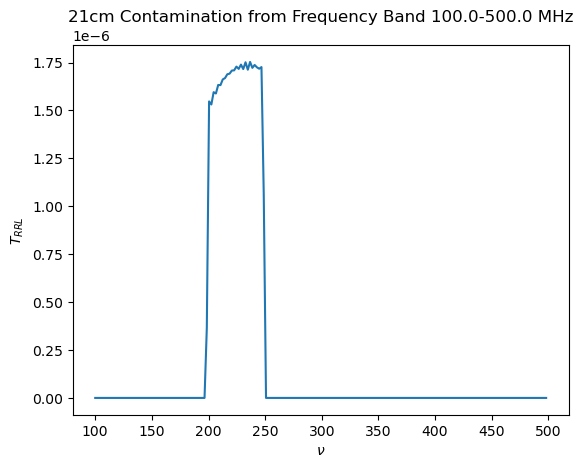

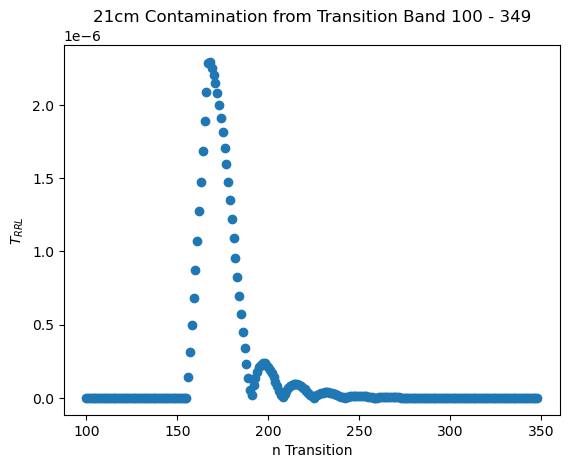

In [1]:
import numpy as np
import RRL_contam

#Redshift Bounds
z_min = 0
z_max = 6

#Observing band of 21cm
HI_freq_min = 200
HI_freq_max = 250

#HII Region Parameters
EM = 10
E_SFR = 0.1
N_HII = 1
linewidth_unshifted = 20
bandwidth = 1

#Fixed values (Temperature fixed by b values from data table)
T = 1e4
bn_file = '13_13_A_C_F.dat'
data = np.hstack(np.loadtxt(bn_file, skiprows=2))

#Transition values (for 'line_contamination' module)
n_min = 100
n_max = 450


# Bandpasses frequency and n
nu_band_min = 100
nu_band_max = 500

n_band_min = 100
n_band_max = 350

contaminationTemperature = RRL_contam.line_contamination(z_min, z_max, n_min, n_max, HI_freq_min, HI_freq_max, \
                                        EM, T, E_SFR, N_HII, linewidth_unshifted, bandwidth, data, nu_band_min, nu_band_max, n_band_min, n_band_max,\
                                                            plot_GPFit = False, plot_freqContam = True, plot_nContam = True)

print(f'Total 21cm Contamination: {contaminationTemperature} K')